In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt





In [12]:
import os
print(os.getcwd())


c:\Users\user\comp90051\code


In [29]:
# 读取 features_part2.csv
features_part2_path = '../data/processedData/more_features.csv'


# 读取CSV文件
df = pd.read_csv(features_part2_path)

# 显示前几行数据
print(df.head())


             LOG_ID            PAT_ID               MRN  Cardiovascular   LOS  \
0  d754f06a7d973a26  837532f458d9c660  0b8de903ea63082a             0.0   1.0   
1  5a95970d5c8fc355  fd18a41f136ed278  0a8b72c1cec4ae47             0.0  10.0   
2  138d44a06cf4b57f  fd18a41f136ed278  0a8b72c1cec4ae47             0.0  10.0   
3  82372dc4703ea1b0  648781c95d863ec6  e0cb9244fedd1ac7             0.0   3.0   
4  4b6aabaf62e85c0a  d1d7b9ddc4962cdf  3918b79e03cefe27             0.0   3.0   

   ICU_ADMIN_FLAG      HEIGHT    WEIGHT  SEX  ASA_RATING_C  ...  \
0               0  187.960000   92.6991    1           2.0  ...   
1               1  168.251459  100.9530    1           3.0  ...   
2               1  168.251459  100.9530    1           3.0  ...   
3               1  160.020000   70.1064    0           2.0  ...   
4               1  168.251459   86.3922    1           2.0  ...   

   ecg_std_magnitude  Calcium  Erythrocyte distribution width  \
0          25.027281        0                

In [30]:
# 显示所有的列名
columns_list = df.columns
print(columns_list)


Index(['LOG_ID', 'PAT_ID', 'MRN', 'Cardiovascular', 'LOS', 'ICU_ADMIN_FLAG',
       'HEIGHT', 'WEIGHT', 'SEX', 'ASA_RATING_C', 'Abnormal Flag',
       'ORDER_STATUS_IMPACT', 'discharge_risk_level', 'BIRTH_DATE',
       'PATIENT_CLASS_GROUP', 'PATIENT_CLASS_NM', 'systolic_peak',
       'diastolic_peak', 'pulse_amplitude', 'arc_peak_frequency',
       'arc_spectral_energy', 'arc_bandwidth', 'qrs_freq_power',
       'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq', 'ecg_std_magnitude',
       'Calcium', 'Erythrocyte distribution width',
       'Erythrocyte mean corpuscular hemoglobin',
       'Erythrocyte mean corpuscular hemoglobin concentration',
       'Erythrocyte mean corpuscular volume', 'Erythrocytes', 'Hematocrit',
       'Hemoglobin', 'cardiac_history'],
      dtype='object')


In [27]:
wave_path = '../data/processedData/waveform_features.csv'

# 读取CSV文件
wave = pd.read_csv(wave_path)

# 显示前几行数据
print(wave.head())


             LOG_ID  systolic_peak  diastolic_peak  pulse_amplitude  \
0  00fbb475a02e94c3         252.12           32.00           220.11   
1  011e00acde3a3342       16279.61         1685.74         14593.87   
2  0124e746e00e3b4a        1520.99          189.51          1331.48   
3  01953a9111bff808        1304.10          171.75          1132.35   
4  01dc302bc8104d42        1958.25          290.57          1667.67   

   arc_peak_frequency  arc_spectral_energy  arc_bandwidth  qrs_freq_power  \
0                7.25         1.208174e+04          50.28          322.92   
1                8.29         1.854711e+08          47.16            0.64   
2                1.55         4.157098e+05          48.78         1452.14   
3               14.92         4.289385e+05          45.24            0.17   
4                0.55         1.068265e+06          45.21            0.36   

   vf_freq_power  vt_freq_power  qrs_peak_freq  ecg_std_magnitude  
0         434.57         869.92           

In [31]:
# 检查数据中的缺失值
missing_values = wave.isnull().sum()

# 显示每列中的缺失值数量
print(missing_values)

LOG_ID                 0
systolic_peak          0
diastolic_peak         0
pulse_amplitude        0
arc_peak_frequency     0
arc_spectral_energy    0
arc_bandwidth          0
qrs_freq_power         0
vf_freq_power          0
vt_freq_power          0
qrs_peak_freq          0
ecg_std_magnitude      0
dtype: int64


In [32]:
# 使用 LOG_ID 作为连接键将两个数据表合并
merged_df = pd.merge(df, wave, on='LOG_ID', how='inner')

# 显示合并后的前几行数据
print(merged_df)

                LOG_ID            PAT_ID               MRN  Cardiovascular  \
0     d754f06a7d973a26  837532f458d9c660  0b8de903ea63082a             0.0   
1     5a95970d5c8fc355  fd18a41f136ed278  0a8b72c1cec4ae47             0.0   
2     138d44a06cf4b57f  fd18a41f136ed278  0a8b72c1cec4ae47             0.0   
3     82372dc4703ea1b0  648781c95d863ec6  e0cb9244fedd1ac7             0.0   
4     36d42e1bdf90c229  d27738cffc04e386  1d46152fba8b80a2             0.0   
...                ...               ...               ...             ...   
1143  3c91718680e4bcc1  93a775deb1b4ff73  7e7a61397cb5e81f             0.0   
1144  2ceee475eb32b69c  0b5d3717c6734d14  a2249ec5be1c0370             1.0   
1145  8116aa4a100ceee8  478a3cd8857cc055  72accda5075f7a39             1.0   
1146  cecd35a626c55d0c  b9878cd048a80cb3  5b9cf2e5349171e8             1.0   
1147  c34b85c0cf941d8a  b5838d1cdf37c09c  d7946ede59551209             1.0   

       LOS  ICU_ADMIN_FLAG      HEIGHT    WEIGHT  SEX  ASA_RATI

In [33]:
print(merged_df.columns)

Index(['LOG_ID', 'PAT_ID', 'MRN', 'Cardiovascular', 'LOS', 'ICU_ADMIN_FLAG',
       'HEIGHT', 'WEIGHT', 'SEX', 'ASA_RATING_C', 'Abnormal Flag',
       'ORDER_STATUS_IMPACT', 'discharge_risk_level', 'BIRTH_DATE',
       'PATIENT_CLASS_GROUP', 'PATIENT_CLASS_NM', 'systolic_peak_x',
       'diastolic_peak_x', 'pulse_amplitude_x', 'arc_peak_frequency_x',
       'arc_spectral_energy_x', 'arc_bandwidth_x', 'qrs_freq_power_x',
       'vf_freq_power_x', 'vt_freq_power_x', 'qrs_peak_freq_x',
       'ecg_std_magnitude_x', 'Calcium', 'Erythrocyte distribution width',
       'Erythrocyte mean corpuscular hemoglobin',
       'Erythrocyte mean corpuscular hemoglobin concentration',
       'Erythrocyte mean corpuscular volume', 'Erythrocytes', 'Hematocrit',
       'Hemoglobin', 'cardiac_history', 'systolic_peak_y', 'diastolic_peak_y',
       'pulse_amplitude_y', 'arc_peak_frequency_y', 'arc_spectral_energy_y',
       'arc_bandwidth_y', 'qrs_freq_power_y', 'vf_freq_power_y',
       'vt_freq_power_y', 

In [38]:
print(merged_df.dtypes)

LOG_ID                                                    object
PAT_ID                                                    object
MRN                                                       object
Cardiovascular                                           float64
LOS                                                      float64
ICU_ADMIN_FLAG                                             int64
HEIGHT                                                   float64
WEIGHT                                                   float64
SEX                                                        int64
ASA_RATING_C                                             float64
Abnormal Flag                                            float64
ORDER_STATUS_IMPACT                                      float64
discharge_risk_level                                       int64
BIRTH_DATE                                                 int64
PATIENT_CLASS_GROUP                                        int64
PATIENT_CLASS_NM         

In [37]:
# 确保只添加一次 _x 后缀
features = [f'{feature}_x' if not feature.endswith('_x') else feature for feature in features]

# 然后继续绘制图
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cardiovascular', y=feature, data=merged_df)
    plt.title(f'Violin Plot of {feature} by Cardiovascular Condition')
    plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
    plt.ylabel(feature)
    plt.show()


ValueError: Could not interpret value `systolic_peak_x_x` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [26]:
# 确保只添加一次 _x 后缀
features = [f'{feature}_x' if not feature.endswith('_x') else feature for feature in features]

# 进行标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

# 保留原始 Cardiovascular 列
scaled_df['Cardiovascular'] = merged_df['Cardiovascular']

# 绘制小提琴图
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cardiovascular', y=feature, data=scaled_df)
    plt.title(f'Violin Plot of {feature} by Cardiovascular Condition')
    plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
    plt.ylabel(feature)
    plt.show()


KeyError: "None of [Index(['systolic_peak_x_x', 'diastolic_peak_x_x', 'pulse_amplitude_x_x',\n       'arc_peak_frequency_x_x', 'arc_spectral_energy_x_x',\n       'arc_bandwidth_x_x', 'qrs_freq_power_x_x', 'vf_freq_power_x_x',\n       'vt_freq_power_x_x', 'qrs_peak_freq_x_x', 'ecg_std_magnitude_x_x'],\n      dtype='object')] are in the [columns]"

In [23]:
print("Features:", features)
print("Merged DataFrame columns:", merged_df.columns)


Features: Index(['systolic_peak', 'diastolic_peak', 'pulse_amplitude',
       'arc_peak_frequency', 'arc_spectral_energy', 'arc_bandwidth',
       'qrs_freq_power', 'vf_freq_power', 'vt_freq_power', 'qrs_peak_freq',
       'ecg_std_magnitude'],
      dtype='object')
Merged DataFrame columns: Index(['LOG_ID', 'PAT_ID', 'MRN', 'Cardiovascular', 'LOS', 'ICU_ADMIN_FLAG',
       'HEIGHT', 'WEIGHT', 'SEX', 'ASA_RATING_C', 'Abnormal Flag',
       'ORDER_STATUS_IMPACT', 'discharge_risk_level', 'BIRTH_DATE',
       'PATIENT_CLASS_GROUP', 'PATIENT_CLASS_NM', 'systolic_peak_x',
       'diastolic_peak_x', 'pulse_amplitude_x', 'arc_peak_frequency_x',
       'arc_spectral_energy_x', 'arc_bandwidth_x', 'qrs_freq_power_x',
       'vf_freq_power_x', 'vt_freq_power_x', 'qrs_peak_freq_x',
       'ecg_std_magnitude_x', 'Calcium', 'Erythrocyte distribution width',
       'Erythrocyte mean corpuscular hemoglobin',
       'Erythrocyte mean corpuscular hemoglobin concentration',
       'Erythrocyte mean corpu

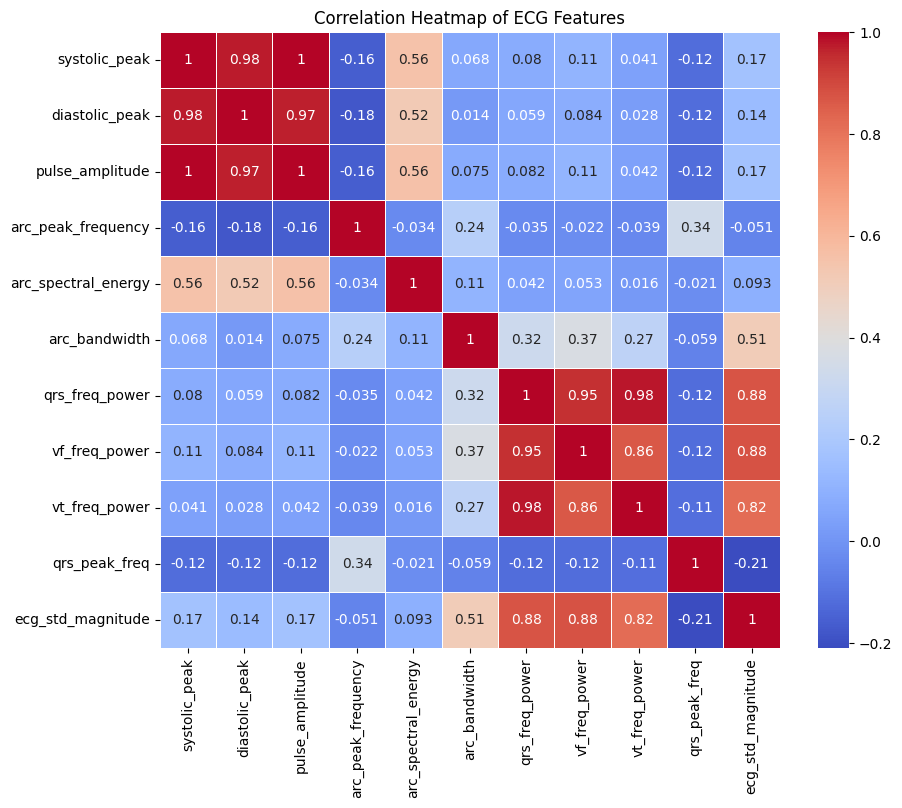

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算特征之间的相关性矩阵
correlation_matrix = wave.drop(columns='LOG_ID').corr()

# 绘制相关性热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of ECG Features')
plt.show()


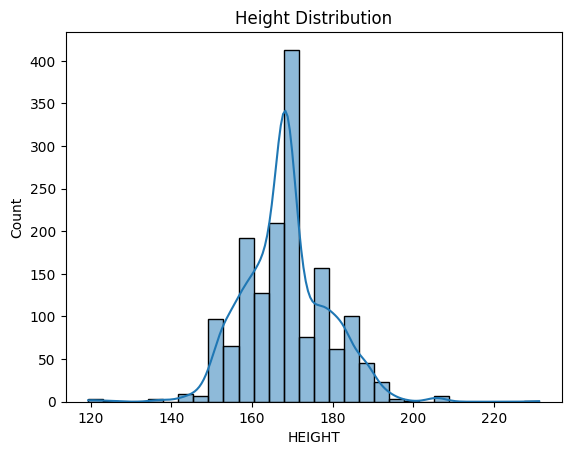

In [127]:
sns.histplot(df['HEIGHT'], bins=30, kde=True)
plt.title('Height Distribution')
plt.show()



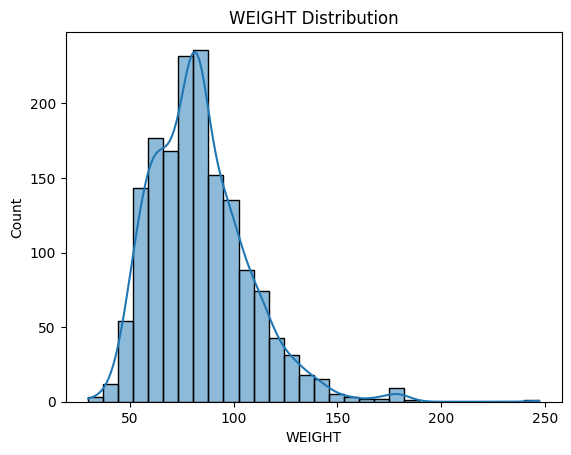

In [130]:
sns.histplot(df['WEIGHT'], bins=30, kde=True)
plt.title('WEIGHT Distribution')
plt.show()

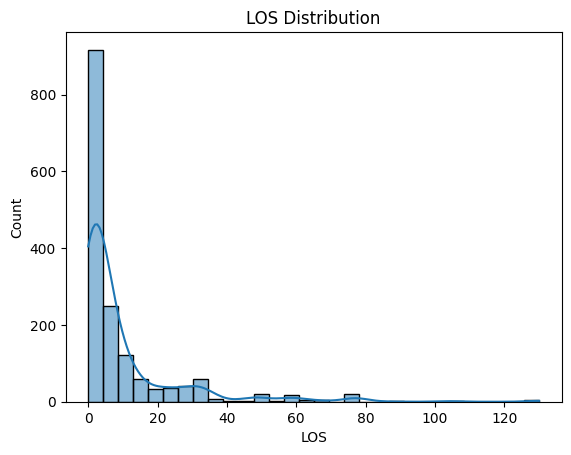

In [131]:
sns.histplot(df['LOS'], bins=30, kde=True)
plt.title('LOS Distribution')
plt.show()


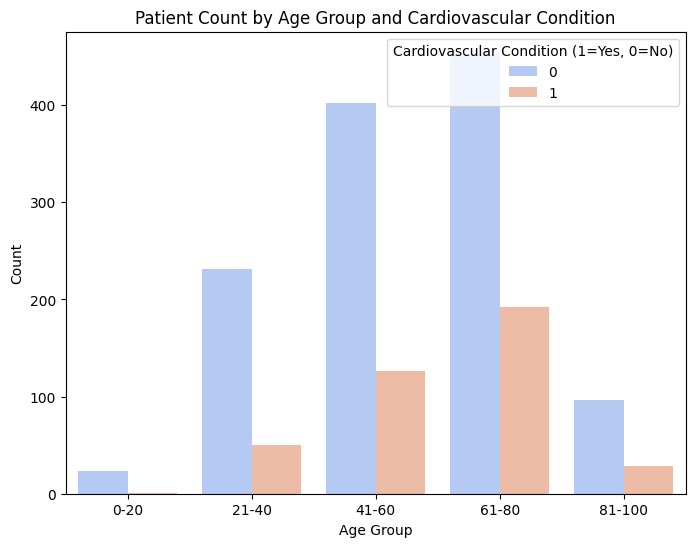

In [145]:
# 将年龄按年龄段分组
bins = [0, 20, 40, 60, 80, 100]  # 年龄段划分
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AGE_GROUP'] = pd.cut(df['BIRTH_DATE'], bins=bins, labels=labels)

# 绘制包含 Cardiovascular 的分组条形图
plt.figure(figsize=(8, 6))
sns.countplot(x='AGE_GROUP', hue='Cardiovascular', data=df, palette='coolwarm')
plt.title('Patient Count by Age Group and Cardiovascular Condition')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Condition (1=Yes, 0=No)')
plt.show()


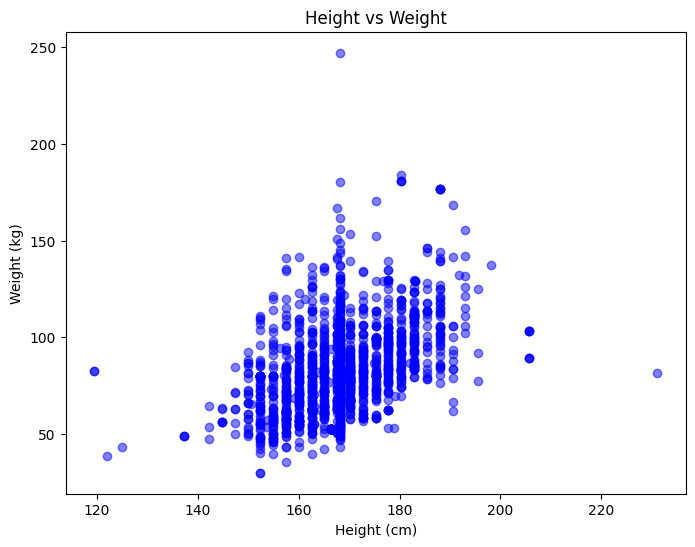

In [121]:
# 绘制病人身高和体重的散点图
plt.figure(figsize=(8, 6))
plt.scatter(df['HEIGHT'], df['WEIGHT'], alpha=0.5, c='blue')
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


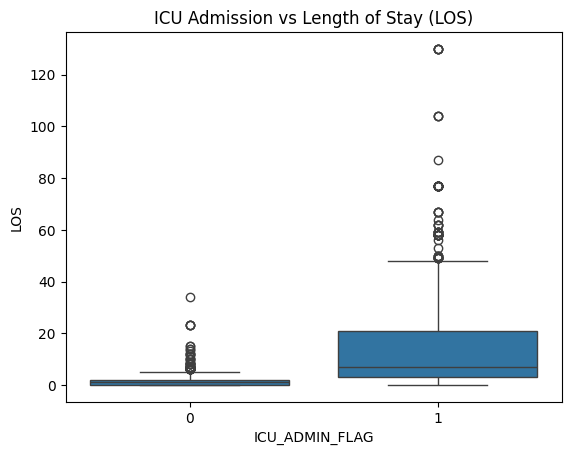

In [132]:
sns.boxplot(x='ICU_ADMIN_FLAG', y='LOS', data=df)
plt.title('ICU Admission vs Length of Stay (LOS)')
plt.show()


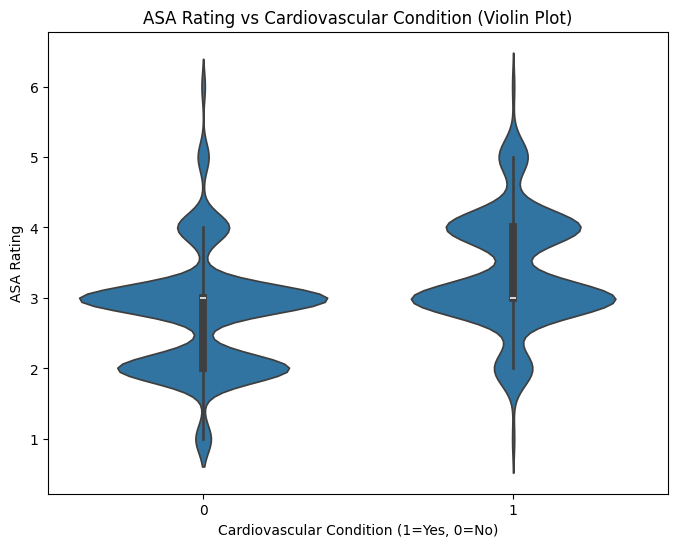

In [135]:
# 小提琴图
plt.figure(figsize=(8, 6))
sns.violinplot(x='Cardiovascular', y='ASA_RATING_C', data=df)
plt.title('ASA Rating vs Cardiovascular Condition (Violin Plot)')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('ASA Rating')
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_39172\691950915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SEX', y='Cardiovascular', data=df, palette='muted')


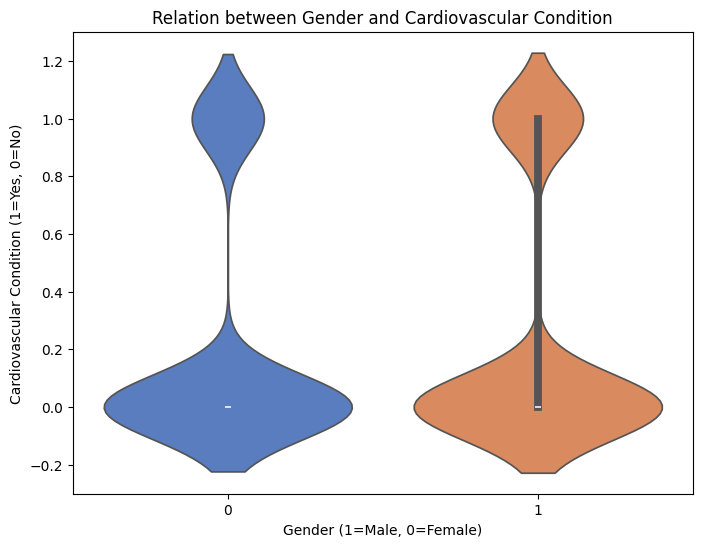

In [123]:

# 使用seaborn绘制小提琴图，展示性别和心血管后遗症之间的关系
plt.figure(figsize=(8, 6))
sns.violinplot(x='SEX', y='Cardiovascular', data=df, palette='muted')
plt.title('Relation between Gender and Cardiovascular Condition')
plt.xlabel('Gender (1=Male, 0=Female)')
plt.ylabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.show()



<Figure size 800x600 with 0 Axes>

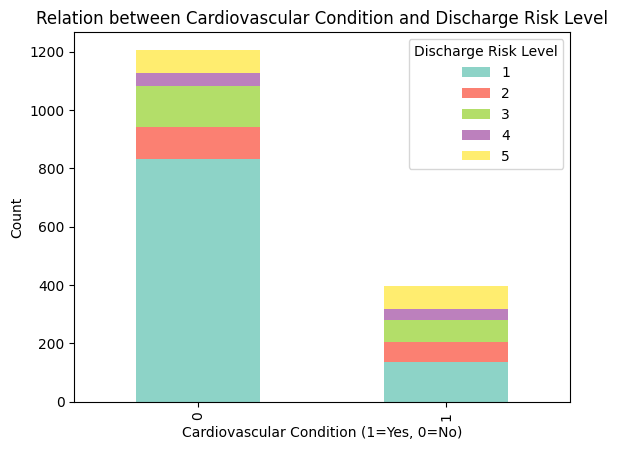

In [141]:

# 使用 Cardiovascular 作为 x 轴，discharge_risk_level 作为 y 轴，绘制堆叠条形图
plt.figure(figsize=(8, 6))
pd.crosstab(df['Cardiovascular'], df['discharge_risk_level']).plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Relation between Cardiovascular Condition and Discharge Risk Level')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Discharge Risk Level')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_39172\750011167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cardiovascular', y='LOS', data=df, palette='Set2')


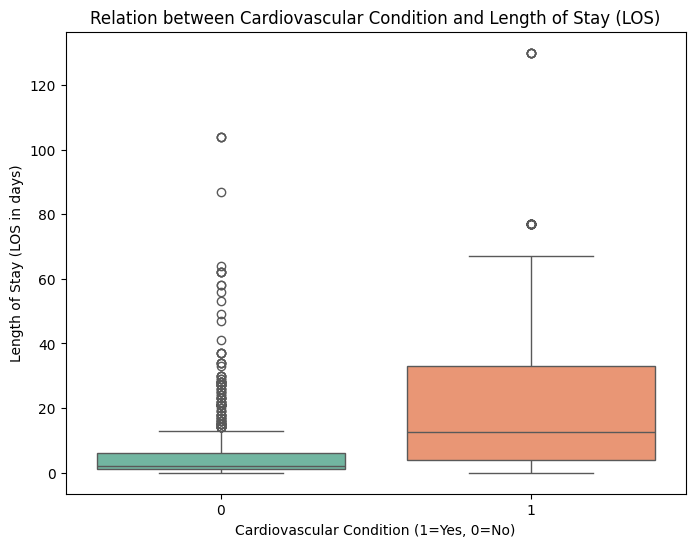

In [125]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cardiovascular', y='LOS', data=df, palette='Set2')
plt.title('Relation between Cardiovascular Condition and Length of Stay (LOS)')
plt.xlabel('Cardiovascular Condition (1=Yes, 0=No)')
plt.ylabel('Length of Stay (LOS in days)')
plt.show()
